<a href="https://colab.research.google.com/github/Vasu456/ClusterView-/blob/main/metrics_Cluster_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules



In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=58a3cfe3720be16ec83abab7638ff767b16fa3a6117af2738804c4865edcabf9
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=499740e511eff143ad6e772188ac19b22b69aeed807211553a78f6c2bdf71dde
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install forcelayout
!pip install pyDRMetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import tarfile
  

# Download and extract the file
url = "https://src.fedoraproject.org/lookaside/pkgs/metis/metis-5.1.0.tar.gz/5465e67079419a69e0116de24fce58fe//metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

import metispy as metis

/content/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX com

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import forcelayout as fl
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial

In [ ]:
import umap.distances as distances
import umap.umap_ as umap
import networkx as nkx

from pyDRMetrics.pyDRMetrics import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files=['bank.csv','cifar.csv','cnae.csv','coil20.csv','epileptic.csv','fashion_mnist.csv','fmd.csv','har.csv','hatespeech.csv','hiva.csv','imdb.csv','orl.csv','secom.csv','seismic.csv','sentiment.csv','sms.csv','spambase.csv','svhn.csv']

In [ ]:
params = [{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0}]


In [ ]:
classes = [2,5,9,20,4,10,10,6,3,2,2,3,2,2,2,2,2,5]

In [ ]:
i=17

In [ ]:
dataset_path = '/content/drive/MyDrive/input_data/'+files[i] 
data_ = pd.read_csv(dataset_path)

In [ ]:
data_ = StandardScaler().fit_transform(data_)

In [ ]:
scaler = MinMaxScaler()
data_ = scaler.fit_transform(data_.astype('float32'))

In [ ]:
data_ = np.array(data_)

In [ ]:
reducer = umap.UMAP(**params[i])
#reducer = umap.UMAP()
reducer.fit(data_)

UMAP(min_dist=0.001, n_neighbors=10, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
graph = reducer.graph_
ngraph = nkx.Graph(graph)

In [ ]:
(edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[i])
#(edgecuts, parts) = metis.part_graph(ngraph, nparts=10)

In [ ]:
embedding = reducer.embedding_

In [ ]:
embedding = reducer.embedding_
embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))

In [ ]:
def calculateClusterCenter(data,parts):
  centre={}
  for i in range(len(parts)):
    if parts[i] in centre:
      centre[parts[i]]+=data[i]
    else:
      centre[parts[i]]=data[i]


  for j in centre:
    try:
      centre[j]/=parts.count(j)
    except:
      centre[j]=centre[j]/parts.count(j)
  
  return centre

centre = calculateClusterCenter(data_,parts)


In [ ]:
def selectCluster(parts, projectedPoints, cluster):
  clusterPoints=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      clusterPoints.append(list(projectedPoints[i]))
  return np.array(clusterPoints)

In [ ]:
def translate(cluster,axis, distance):
  toAdd = [0,0]
  toAdd[axis] = distance
  return cluster+toAdd

In [ ]:
def changeCluster(parts, coordinates, projected, cluster):
  count=0
  newProjected=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      newProjected.append(coordinates[count])
      count+=1
    else:
      newProjected.append(projected[i])
  return newProjected

In [ ]:
def forceDirectedCentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  layout = fl.draw_spring_layout(dataset=clusterCentres, algorithm=fl.SpringForce)

  print(layout.get_stress())

  forceDirectedPositions = layout.get_positions()

  return forceDirectedPositions

In [ ]:
def PCACentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  pcaCoords = PCA(n_components=2).fit_transform(clusterCentres)

  return pcaCoords

In [ ]:
def posDifference(highDimensionCentres, lowDimensionCentres, initializer):
  if initializer=="fdl":
    centreRepresentation = forceDirectedCentres(highDimensionCentres, parts)
  elif initializer=="pca":
    centreRepresentation = PCACentres(highDimensionCentres, parts)

  centre2d = np.array(lowDimensionCentres[0])
  for i in range(1,len(set(parts))):
    centre2d=np.vstack((centre2d, lowDimensionCentres[i]))

  return centreRepresentation - centre2d

In [ ]:
def translateUsingDifference(difference, parts, embedding):
  newEmbedding = embedding 
  for i in range(len(difference)):
    x = selectCluster(parts, newEmbedding, i)
    translated = translate(x, 0, difference[i][0])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

    y = selectCluster(parts, newEmbedding, i)
    translated = translate(y, 1, difference[i][1])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

  return newEmbedding

0.02068742204583261


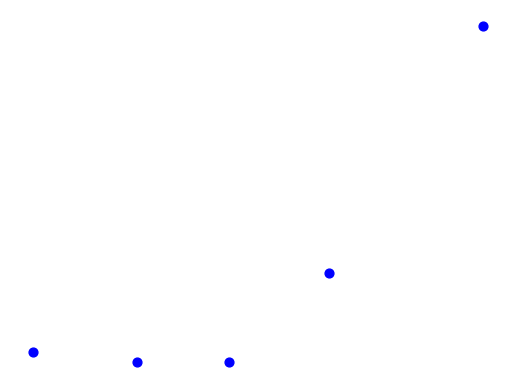

In [ ]:
initialCentres = calculateClusterCenter(embedding_scaled,parts)
clusterCentres = np.array(centre.get(i, []))

differenceFDL = posDifference(centre, initialCentres, "fdl")

In [ ]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def compute_tandc(k, data_, embeddings):
    n = data_.shape[0]

    D_high = pairwise_distances(data_)
    D_low = pairwise_distances(embeddings)

    nn_orig = D_high.argsort()
    nn_proj = D_low.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i_t = 0
    sum_i_c = 0

    for i in range(n):
        V = np.setdiff1d(knn_orig[i], knn_proj[i])
        U = np.setdiff1d(knn_proj[i], knn_orig[i])

        sum_j_t = 0
        for j in range(U.shape[0]):
            sum_j_t += np.where(nn_orig[i] == U[j])[0] - k

        sum_j_c = 0
        for j in range(V.shape[0]):
            sum_j_c += np.where(nn_proj[i] == V[j])[0] - k

        sum_i_t += sum_j_t
        sum_i_c += sum_j_c

    T = float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i_t)).squeeze())
    C = float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i_c)).squeeze())

    return T, C


In [ ]:
trustworthiness, continuity = compute_tandc(7, data_, translatedEmbeddingFDL)
print("Trustworthiness:", trustworthiness)
print("Continuity:", continuity)

Trustworthiness: 0.904215943897852
Continuity: 0.918476701519379


0.020904222422836


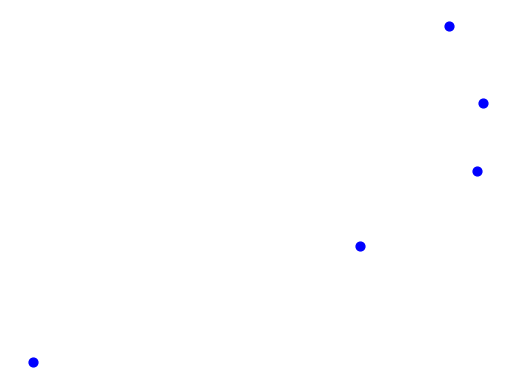

In [ ]:
initialCentres = calculateClusterCenter(embedding,parts)
differenceFDL = posDifference(centre, initialCentres, "fdl")


In [ ]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding)

In [ ]:
trustworthiness, continuity = compute_tandc(7, data_, translatedEmbeddingFDL)
print("Trustworthiness:", trustworthiness)
print("Continuity:", continuity)

Trustworthiness: 0.9030032990436346
Continuity: 0.8908668353542276
